In [129]:
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [130]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"${new_x:,.0f}K"

In [131]:
# url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'

# original_df = pd.read_csv(url)

In [132]:
df = original_df;

In [133]:
df.shape

(22467, 281)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


In [135]:
df = df.loc[df['SizeRank'] < 4]


# how do we know the indexes are the same as the SizeRank? does it come from the API?  edit: do we know this?

In [136]:
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [137]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [138]:
id_vars = df.columns[:8]

In [139]:
melted = df.melt(id_vars=id_vars, var_name='datetime', value_name='HouseValue')

In [140]:
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,datetime,HouseValue
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [141]:
melted.datetime = pd.to_datetime(melted.datetime)
melted = melted.set_index('datetime')

In [142]:
melted.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='datetime', length=1092, freq=None)

In [143]:
ts = melted.groupby('RegionName').resample('M')['HouseValue'].mean()
ts = pd.DataFrame(ts)

In [144]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1092 entries, ('Chicago', Timestamp('2000-01-31 00:00:00', freq='M')) to ('New York', Timestamp('2022-09-30 00:00:00', freq='M'))
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HouseValue  1087 non-null   float64
dtypes: float64(1)
memory usage: 22.3+ KB


In [145]:
ts.unstack().T.columns

Index(['Chicago', 'Houston', 'Los Angeles', 'New York'], dtype='object', name='RegionName')

In [146]:
ts.head()

HouseValue
RegionName datetime              
Chicago    2000-01-31    166139.0
           2000-02-29    166536.0
           2000-03-31    167368.0
           2000-04-30    168826.0
           2000-05-31    170499.0

In [147]:
unstacked = ts.unstack(0)[['HouseValue']]

<Axes: xlabel='Date', ylabel='Home Value'>

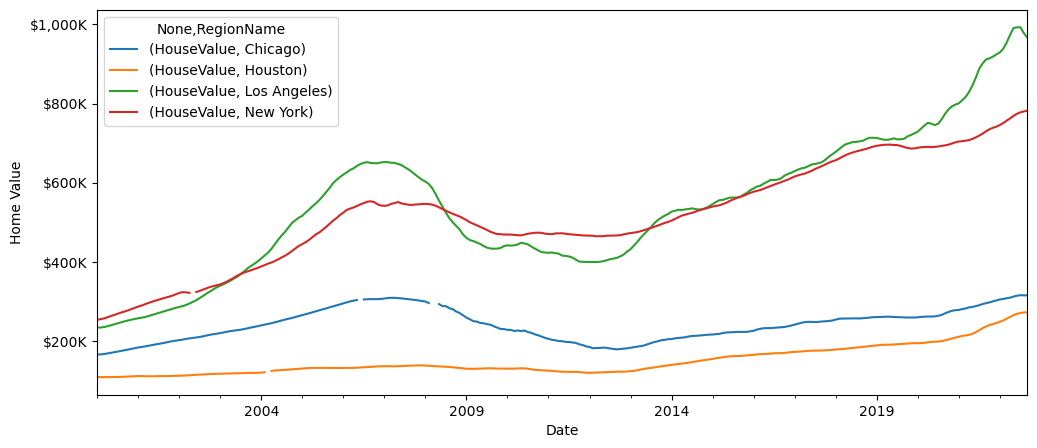

In [151]:
fig, ax = plt.subplots(figsize=(12,5))

fmt_thous = mticks.FuncFormatter(thousands)
ax.set(ylabel='Home Value')

ax.yaxis.set_major_formatter(fmt_thous)
unstacked.plot(ax=ax, xlabel='Date')

## Questions

### 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Answer: New York

### 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [152]:
unstacked.head()

HouseValue                                
RegionName    Chicago   Houston Los Angeles  New York
datetime                                             
2000-01-31   166139.0  109068.0    234181.0  253690.0
2000-02-29   166536.0  109079.0    234401.0  255517.0
2000-03-31   167368.0  108878.0    235513.0  257207.0
2000-04-30   168826.0  108881.0    237589.0  260310.0
2000-05-31   170499.0  108834.0    240113.0  263204.0

In [154]:
unstacked.loc['2008-11']
# unstacked.loc['2008-12']

HouseValue                                
RegionName    Chicago   Houston Los Angeles  New York
datetime                                             
2008-11-30   271059.0  132247.0    481905.0  514767.0

In [156]:
unstacked.loc['2008-11':'2008-12'].diff()

HouseValue                             
RegionName    Chicago Houston Los Angeles New York
datetime                                          
2008-11-30        NaN     NaN         NaN      NaN
2008-12-31    -5753.0  -964.0    -12611.0  -4458.0

Answer:

* Chicago: \$-5753
* Houston: \$-964
* LosAngeles: \$-12611
* New York: \$-4458